# Data Collection

excl means 0\
incl means 1\
nine means 2

cadical-high-60K-1227B.champsimtrace.xz means 0\
cadical-high-60K-134B.champsimtrace.xz means 1\
kissat-inc-high-30K-1802B.champsimtrace.xz means 2

drrip means 0\
fifo means 1\
lfu means 2\
lru means 3\
ship means 4\
ssrip means 5

stores 3->3->6 - heir->trace->repl: [IPC, L1D-MR, L2-MR, LLC-MR]

example: suppose you want the [IPC, L1D-MR, L2-MR, LLC-MR] for incl, cadical-high-60K-134B.champsimtrace.xz, lfu\
use final[1][0][2]\
code will be modified in case we implement the size thing

In [43]:
import os

files_excl = sorted(os.listdir('./results/results_excl/results_30M'))
files_incl = sorted(os.listdir('./results/results_incl/results_30M'))
files_nine = sorted(os.listdir('./results/results_nine/results_30M'))

final = [[], [], []] # stores 3->3->6 - heir->trace->repl: [IPC, L1D-MR, L2-MR, LLC-MR]

for i in range(3):
    for_each_trace = []
    for j in range(6):
        for_each_repl = []
        file = open('./results/results_excl/results_30M/%s'%(files_excl[6*i+j]), 'r').read().split('\n')
        line = 0
        while(not file[line].startswith('CPU 0 cumulative IPC')):
            line = line+1
        for_each_repl.append(float(file[line].split()[4]))
        while(not file[line].startswith('L1D TOTAL     ACCESS')):
            line = line+1
        for_each_repl.append(float(file[line].split()[7])/float(file[line].split()[3]))
        while(not file[line].startswith('L2C TOTAL     ACCESS')):
            line = line+1
        for_each_repl.append(float(file[line].split()[7])/float(file[line].split()[3]))
        while(not file[line].startswith('LLC TOTAL     ACCESS')):
            line = line+1
        for_each_repl.append(float(file[line].split()[7])/float(file[line].split()[3]))
        for_each_trace.append(for_each_repl)
    final[0].append(for_each_trace)

for i in range(3):
    for_each_trace = []
    for j in range(6):
        for_each_repl = []
        file = open('./results/results_incl/results_30M/%s'%(files_incl[6*i+j]), 'r').read().split('\n')
        line = 0
        while(not file[line].startswith('CPU 0 cumulative IPC')):
            line = line+1
        for_each_repl.append(float(file[line].split()[4]))
        while(not file[line].startswith('L1D TOTAL     ACCESS')):
            line = line+1
        for_each_repl.append(float(file[line].split()[7])/float(file[line].split()[3]))
        while(not file[line].startswith('L2C TOTAL     ACCESS')):
            line = line+1
        for_each_repl.append(float(file[line].split()[7])/float(file[line].split()[3]))
        while(not file[line].startswith('LLC TOTAL     ACCESS')):
            line = line+1
        for_each_repl.append(float(file[line].split()[7])/float(file[line].split()[3]))
        for_each_trace.append(for_each_repl)
    final[1].append(for_each_trace)

for i in range(3):
    for_each_trace = []
    for j in range(6):
        for_each_repl = []
        file = open('./results/results_nine/results_30M/%s'%(files_nine[6*i+j]), 'r').read().split('\n')
        line = 0
        while(not file[line].startswith('CPU 0 cumulative IPC')):
            line = line+1
        for_each_repl.append(float(file[line].split()[4]))
        while(not file[line].startswith('L1D TOTAL     ACCESS')):
            line = line+1
        for_each_repl.append(float(file[line].split()[7])/float(file[line].split()[3]))
        while(not file[line].startswith('L2C TOTAL     ACCESS')):
            line = line+1
        for_each_repl.append(float(file[line].split()[7])/float(file[line].split()[3]))
        while(not file[line].startswith('LLC TOTAL     ACCESS')):
            line = line+1
        for_each_repl.append(float(file[line].split()[7])/float(file[line].split()[3]))
        for_each_trace.append(for_each_repl)
    final[2].append(for_each_trace)

for i in final:
    print(i)

[[[0.146102, 0.1831878594051882, 0.9932583717925322, 0.6595631064723897], [0.145715, 0.1831914883047166, 0.9932407746376422, 0.6674070629009125], [0.140115, 0.18316249182620145, 0.9932429832600856, 0.9842929260371537], [0.145715, 0.1831914883047166, 0.9932407746376422, 0.6674070629009125], [0.148473, 0.18317690183057816, 0.9932323586190318, 0.6612538022731511], [0.146201, 0.18319319675079515, 0.9932396802333571, 0.6561583119582386]], [[0.156847, 0.1731097473884596, 0.9961919367784352, 0.662732453901391], [0.156437, 0.17309188956566804, 0.9961647741810535, 0.6710317782056764], [0.15054, 0.17307921858980543, 0.9961632041555644, 0.9902636983262414], [0.156437, 0.17309188956566804, 0.9961647741810535, 0.6710317782056764], [0.159558, 0.17315675678623232, 0.9962080759754669, 0.6640942129165647], [0.157002, 0.17310258077089236, 0.9961730390958579, 0.6593468844686791]], [[0.307077, 0.0545055070641287, 0.9856741034155726, 0.6437847033440678], [0.307456, 0.05449107803305258, 0.9855714281854314, 

# Time to Plot

We'll have 12 plots, 4 for each trace (comparing IPC and the 3 miss-rates respectively).\
Each plot has 6 (corresponding to 6 replacement policies) times 3 (corresponding to 3 hierarchy policies) = 18 bars.

In [44]:
import matplotlib.pyplot as plt
import numpy as np
barWidth = 0.1
traces = ['cadical-high-60K-1227B.champsimtrace.xz', 'cadical-high-60K-134B.champsimtrace.xz', 'kissat-inc-high-30K-1802B.champsimtrace.xz']

In [45]:
def plot_graph(trace):
	XLABS = ['IPC', 'L1D miss-rate', 'L2C miss-rate', 'LLC miss-rate']

	for j in range(4):
		fig = plt.subplots(figsize =(12, 8))

		EXCL = []
		INCL = []
		NINE = []

		for i in range(6):
			EXCL.append(final[0][trace][i][j])
			INCL.append(final[1][trace][i][j])
			NINE.append(final[2][trace][i][j])

		br1 = np.arange(6)
		br2 = [x + barWidth for x in br1]
		br3 = [x + barWidth for x in br2]

		plt.bar(br1, EXCL, color ='r', width = barWidth, edgecolor ='grey', label ='EXCL')
		plt.bar(br2, INCL, color ='g', width = barWidth, edgecolor ='grey', label ='INCL')
		plt.bar(br3, NINE, color ='b', width = barWidth, edgecolor ='grey', label ='NINE')

		plt.xticks([r + barWidth for r in range(6)], ['drrip', 'fifo', 'lfu', 'lru', 'ship', 'srrip'])

		plt.ylabel(XLABS[j], fontweight ='bold', fontsize = 15)

		plt.ylim(min(EXCL+INCL+NINE)*0.99, max(EXCL+INCL+NINE)*1.01)
		plt.title(traces[trace])

		plt.show()

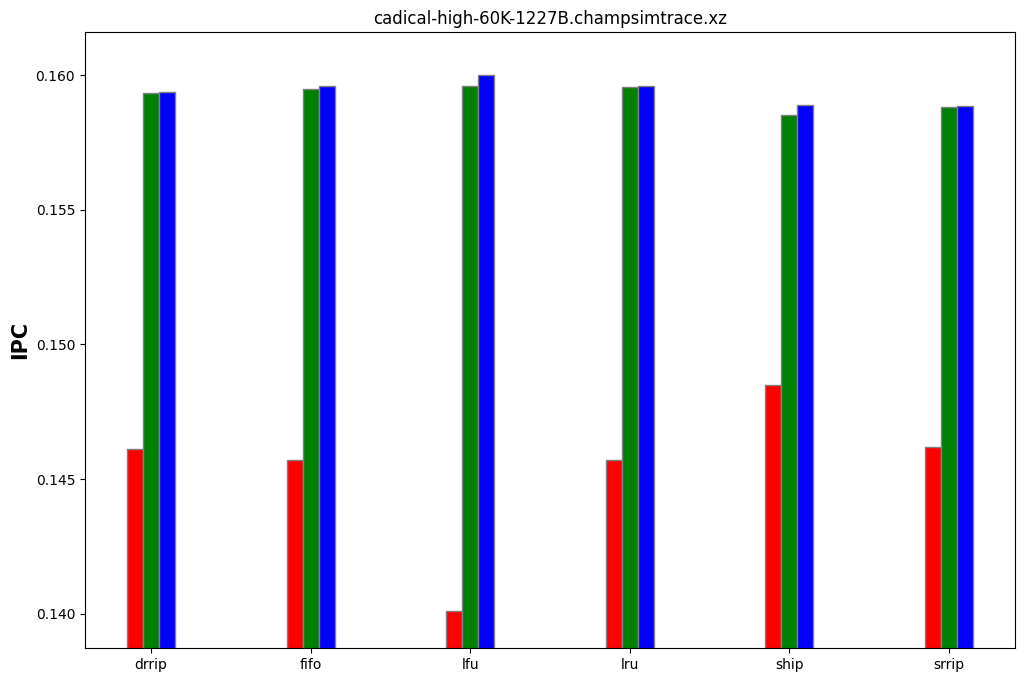

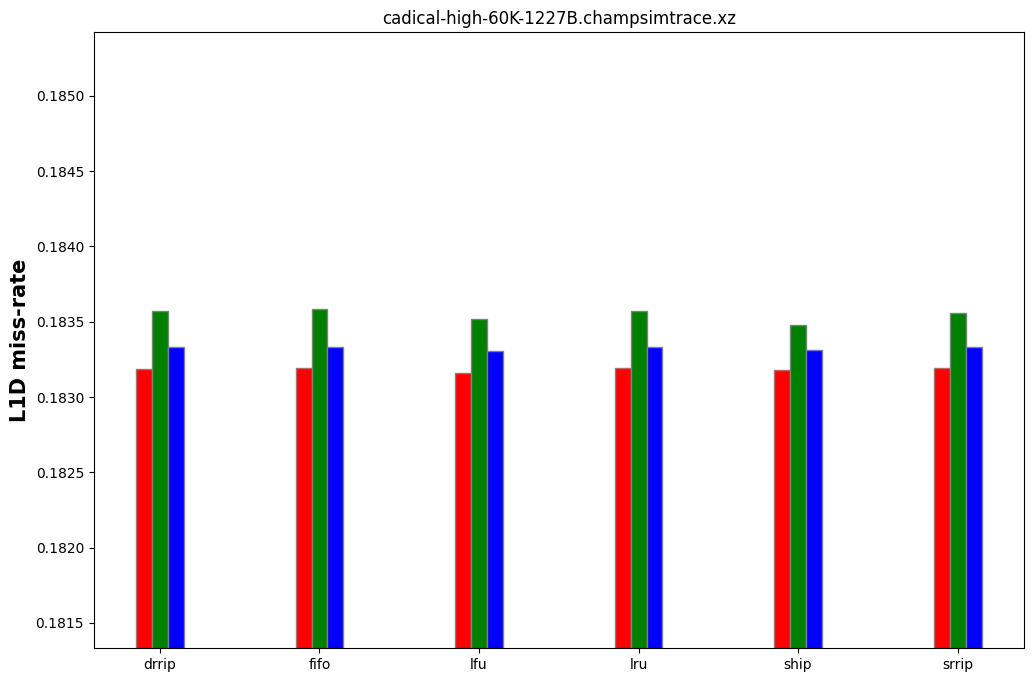

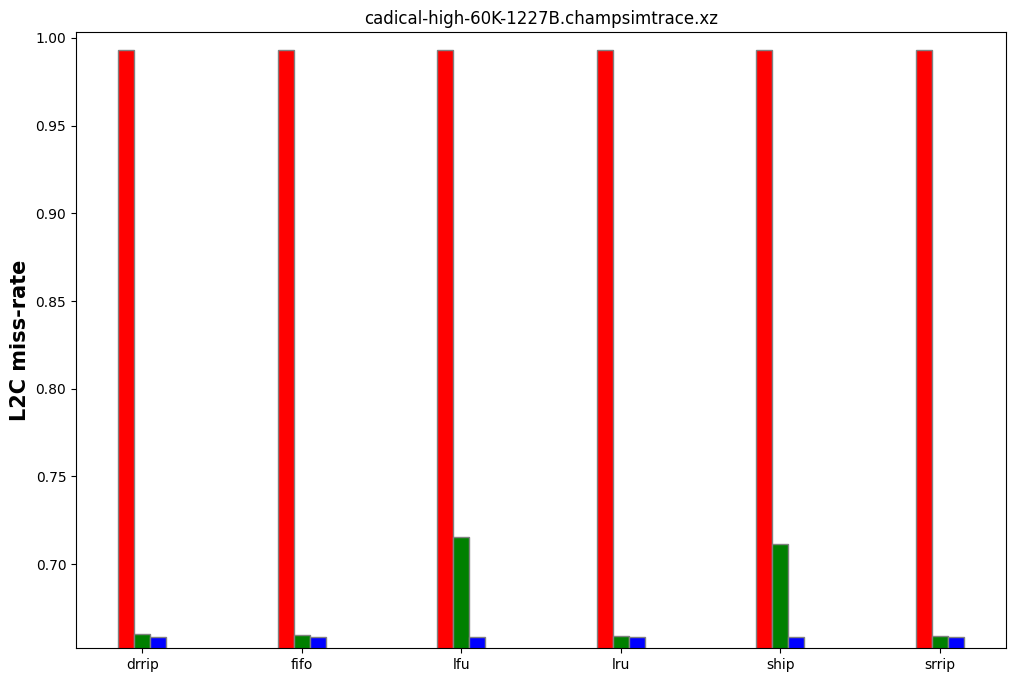

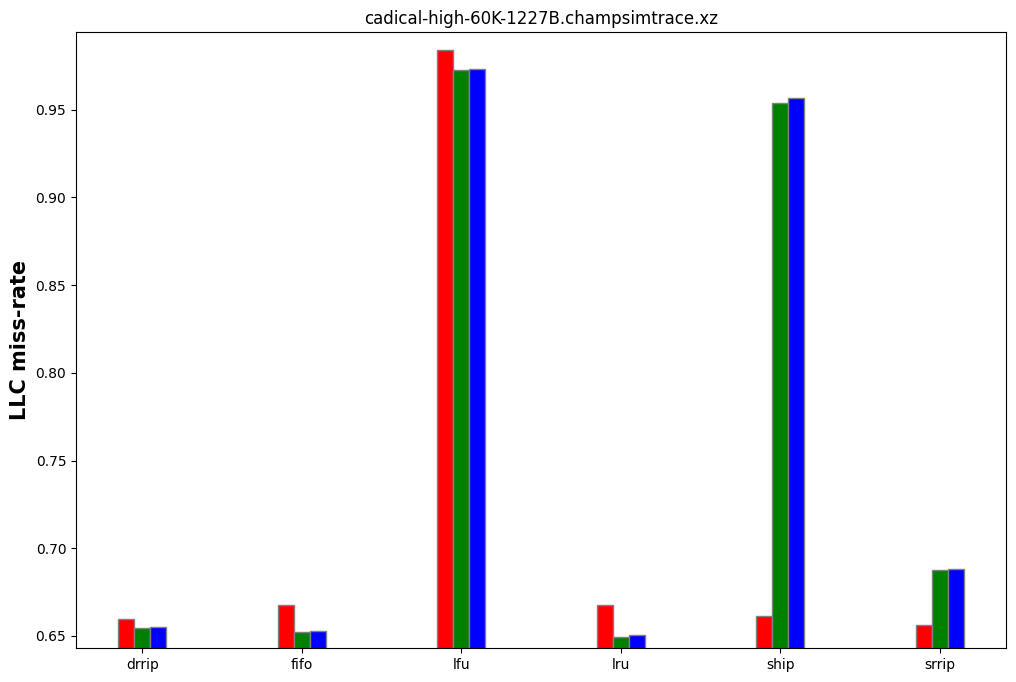

In [46]:
plot_graph(0)

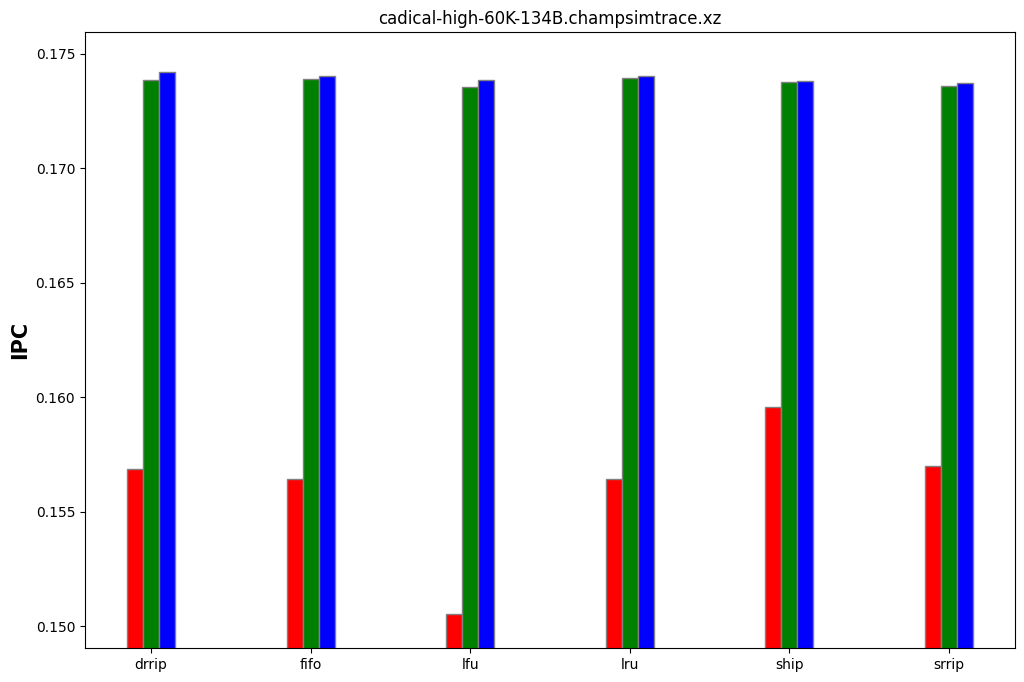

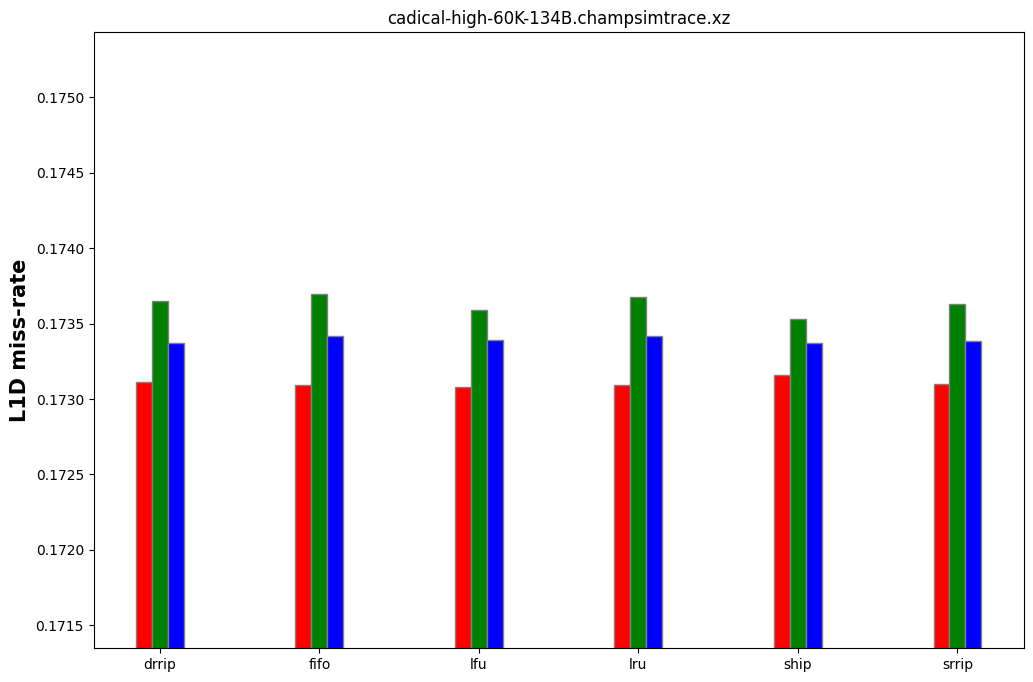

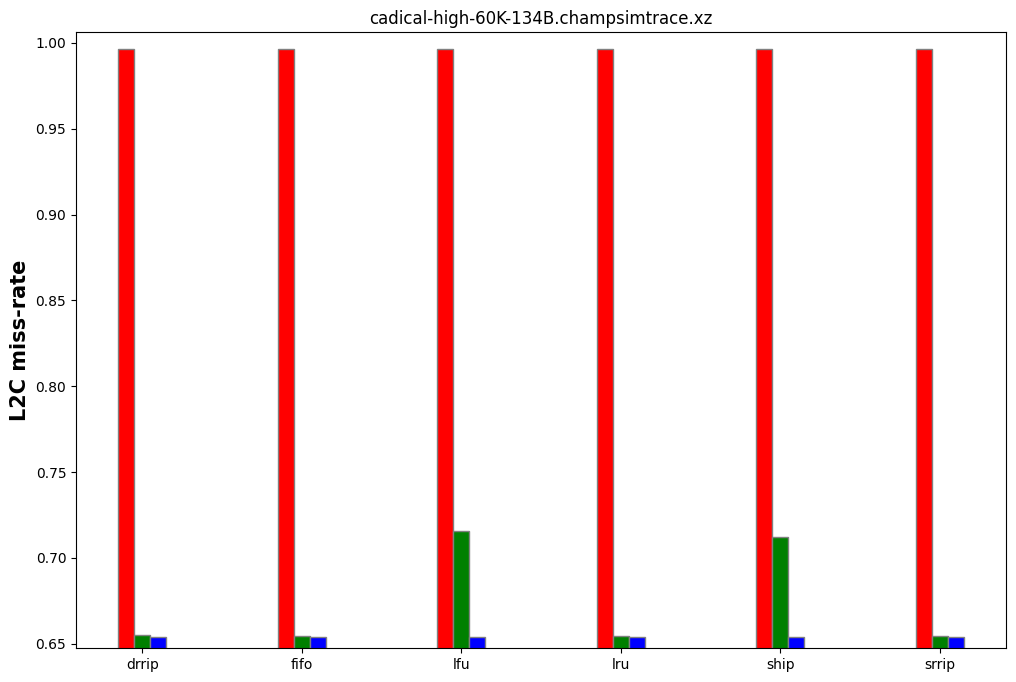

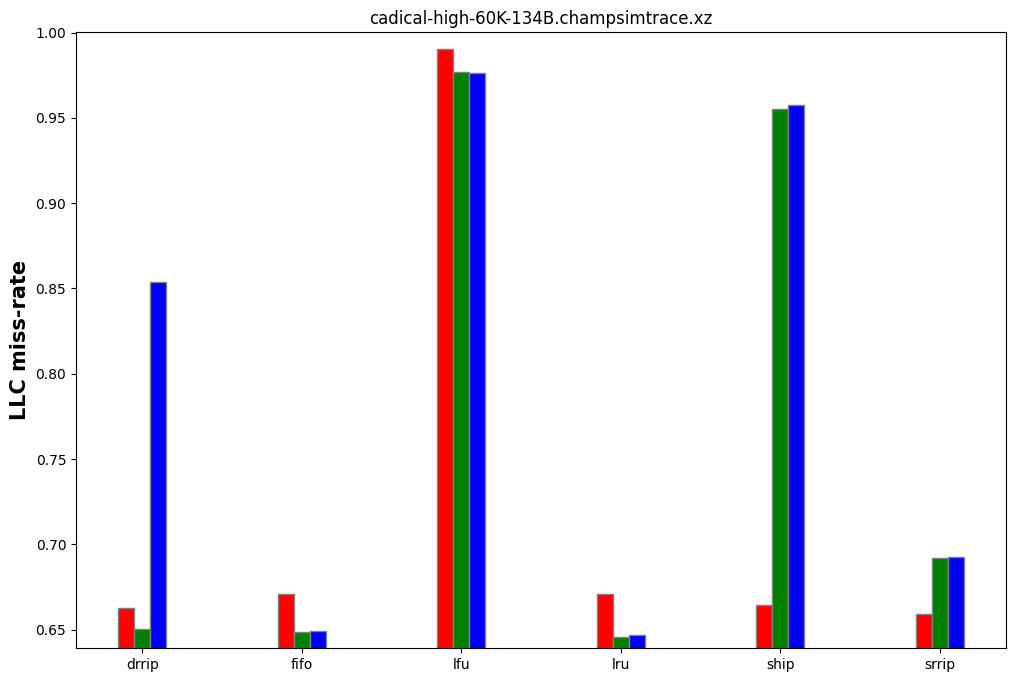

In [47]:
plot_graph(1)

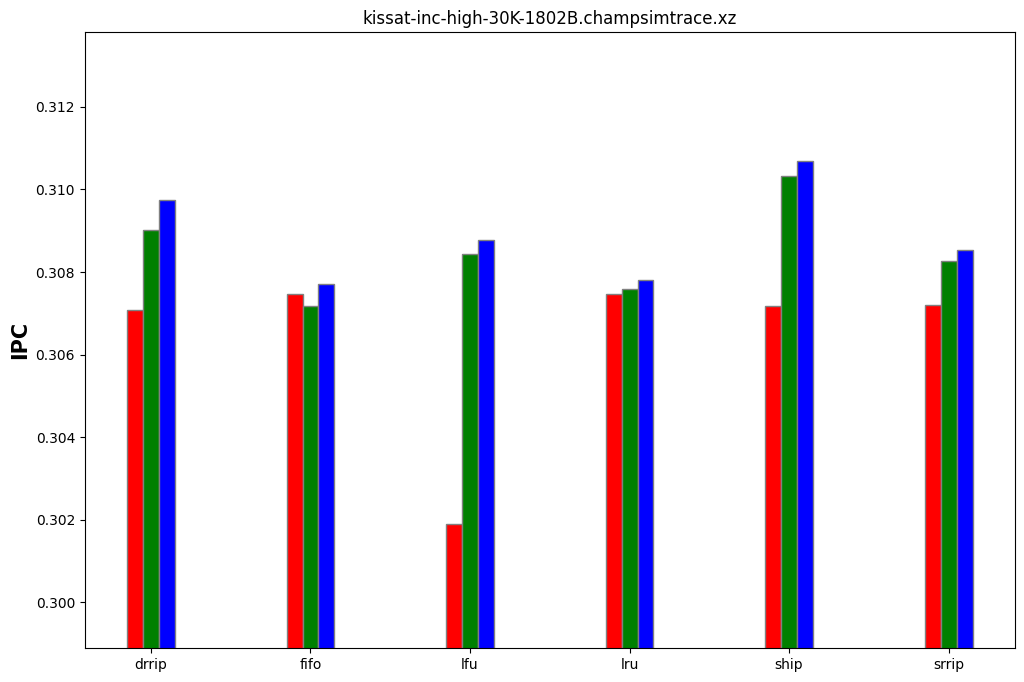

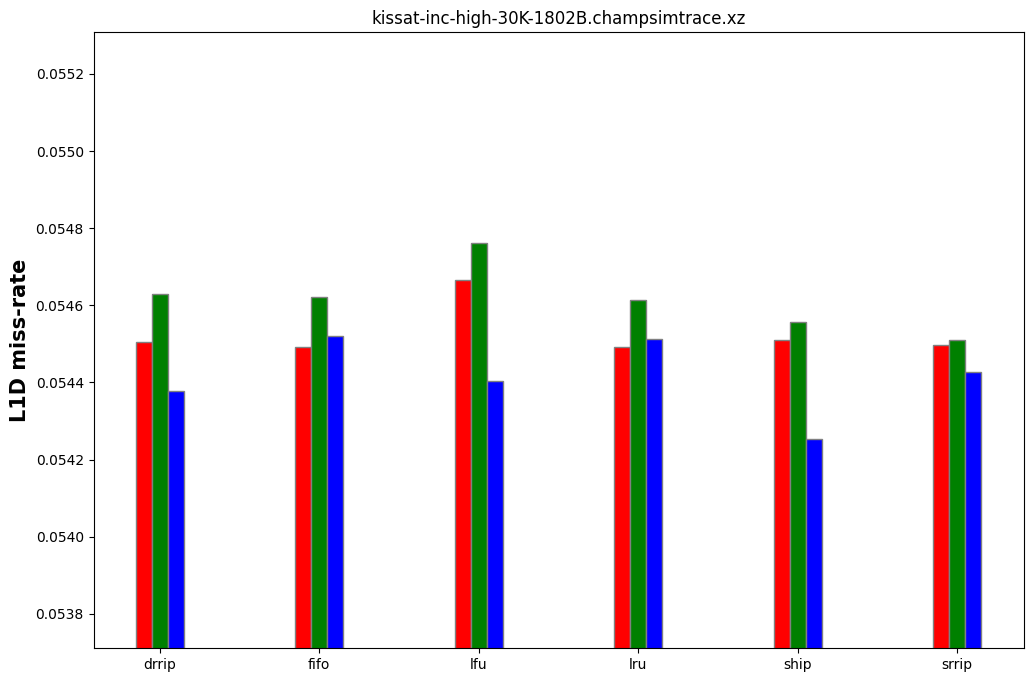

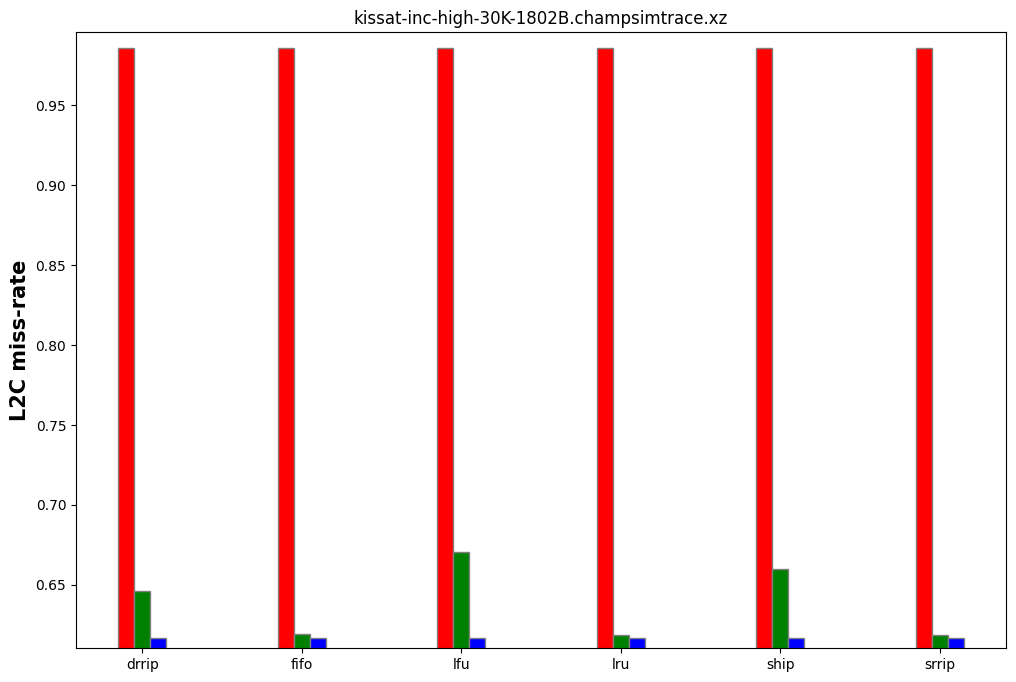

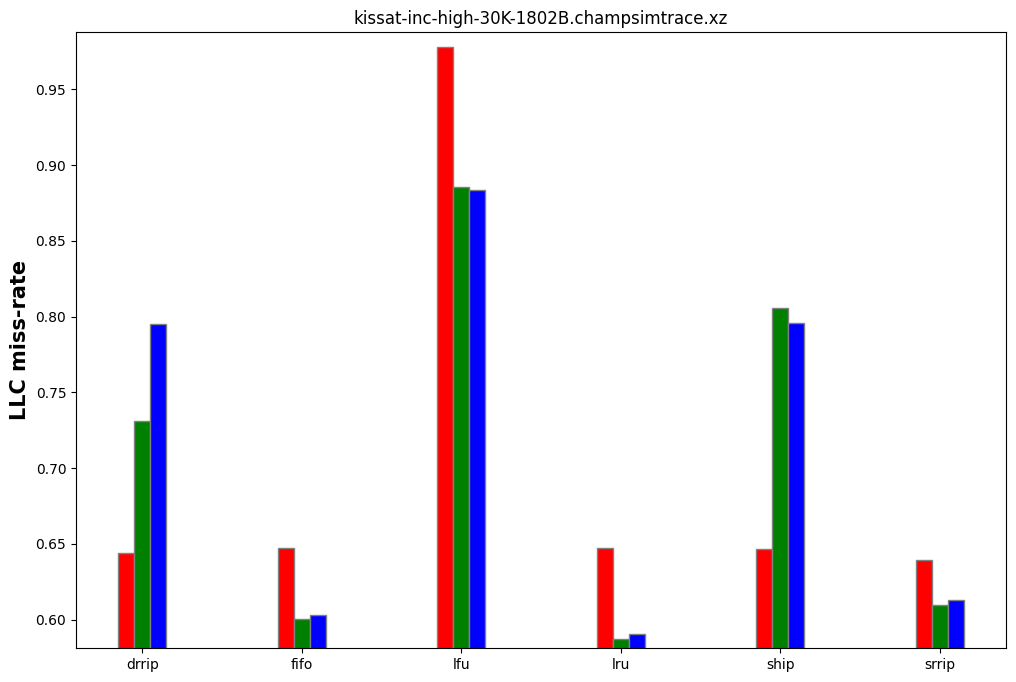

In [48]:
plot_graph(2)